Name: Ranjani Ravindrabharathy

This file contains the code for the GARCH Modeling. I used the Total Sales data set, New Orders dataset, Gas Prices Dataset, Auto Inventory/Sales Ratio dataset, CPI Dataset, and Federal Funds Rate dataset. This Code also contain all the GARCH Validation Tests.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import het_arch
from arch import arch_model

base_path = "/Users/ranjaniravib/Documents/GT ISYE 6402/"

def load_fred_series(filename):
    df = pd.read_csv(base_path + filename)
    date_col = [c for c in df.columns if "DATE" in c.upper() or "OBSERVATION" in c.upper()][0]
    val_col = [c for c in df.columns if c != date_col][0]
    df[date_col] = pd.to_datetime(df[date_col])
    df = df.sort_values(date_col)
    df = df[[date_col, val_col]].dropna()
    df = df.set_index(date_col)
    df = df.asfreq("MS")
    return df[val_col].astype(float)

def make_log_returns(series):
    return 100 * np.log(series).diff().dropna()

def fit_ar1_garch11(returns):
    model = arch_model(
        returns,
        mean="AR",
        lags=1,
        vol="GARCH",
        p=1,
        q=1,
        dist="normal",
        rescale=False
    )
    res = model.fit(update_freq=0, disp="off")
    return res

def arch_lm_before_after(returns, garch_res, nlags=12):
    ar = ARIMA(returns, order=(1, 0, 0)).fit()
    lm1 = het_arch(pd.Series(ar.resid).dropna(), nlags=nlags)

    std_resid = pd.Series(garch_res.std_resid).dropna()
    lm2 = het_arch(std_resid, nlags=nlags)

    out = {
        "pre_arch_lm_stat": lm1[0],
        "pre_arch_lm_pvalue": lm1[1],
        "post_arch_lm_stat": lm2[0],
        "post_arch_lm_pvalue": lm2[1]
    }
    return out

def garch_diagnostics(garch_res):
    p = garch_res.params
    omega = p.get("omega", np.nan)
    alpha = p.get("alpha[1]", np.nan)
    beta = p.get("beta[1]", np.nan)

    ab = np.nan
    unc_var = np.nan
    unc_vol = np.nan

    if np.isfinite(alpha) and np.isfinite(beta):
        ab = alpha + beta
        if np.isfinite(omega) and ab < 1:
            unc_var = omega / (1 - ab)
            unc_vol = np.sqrt(unc_var)

    out = {
        "omega": omega,
        "alpha": alpha,
        "beta": beta,
        "alpha_plus_beta": ab,
        "unc_var": unc_var,
        "unc_vol": unc_vol,
        "loglik": garch_res.loglikelihood,
        "aic": garch_res.aic,
        "bic": garch_res.bic
    }
    return out

def plot_conditional_volatility(garch_res, title):
    vol = garch_res.conditional_volatility
    plt.figure(figsize=(10, 4))
    plt.plot(vol.index, vol.values)
    plt.title(title)
    plt.tight_layout()
    plt.show()


## GARCH model for Total Vehicle Sales (TOTALSA)

=== TOTALSA AR(1)-GARCH(1,1) summary ===
                           AR - GARCH Model Results                           
Dep. Variable:                TOTALSA   R-squared:                       0.023
Mean Model:                        AR   Adj. R-squared:                  0.020
Vol Model:                      GARCH   Log-Likelihood:               -896.423
Distribution:                  Normal   AIC:                           1802.85
Method:            Maximum Likelihood   BIC:                           1821.14
                                        No. Observations:                  287
Date:                Sun, Dec 07 2025   Df Residuals:                      285
Time:                        10:49:17   Df Model:                            2
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
Const          0.146

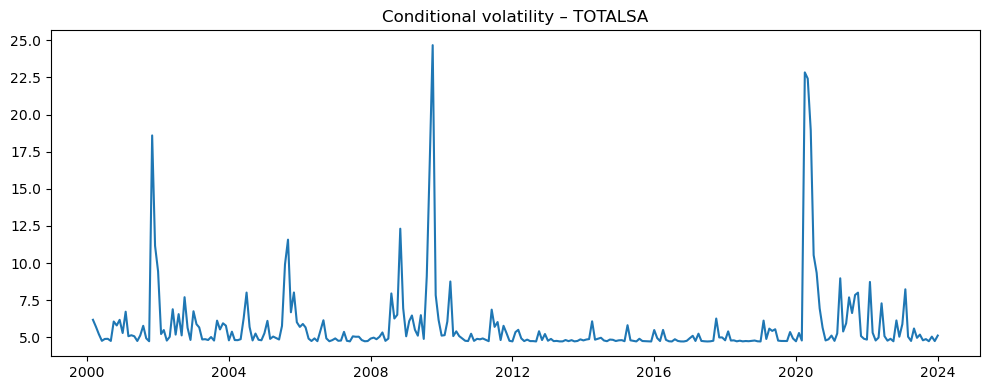

In [3]:
total_series = load_fred_series("TOTALSA (1).csv")
total_ret = make_log_returns(total_series)

total_garch = fit_ar1_garch11(total_ret)

print("=== TOTALSA AR(1)-GARCH(1,1) summary ===")
print(total_garch.summary())

total_arch = arch_lm_before_after(total_ret, total_garch)
print("\nARCH LM (TOTALSA):")
print(total_arch)

total_diag = garch_diagnostics(total_garch)
print("\nDiagnostics (TOTALSA):")
print(total_diag)

plot_conditional_volatility(total_garch, "Conditional volatility – TOTALSA")


## GARCH model for New Orders (AMVPNO)

=== AMVPNO AR(1)-GARCH(1,1) summary ===
                           AR - GARCH Model Results                           
Dep. Variable:                 AMVPNO   R-squared:                      -0.076
Mean Model:                        AR   Adj. R-squared:                 -0.080
Vol Model:                      GARCH   Log-Likelihood:               -845.921
Distribution:                  Normal   AIC:                           1701.84
Method:            Maximum Likelihood   BIC:                           1720.14
                                        No. Observations:                  287
Date:                Sun, Dec 07 2025   Df Residuals:                      285
Time:                        10:56:38   Df Model:                            2
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
Const          0.0484

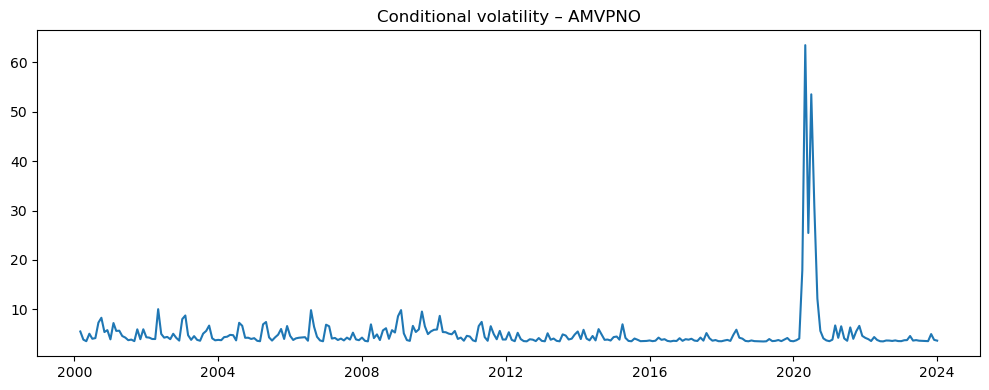

In [4]:
amvpno_series = load_fred_series("AMVPNO (1).csv")
amvpno_ret = make_log_returns(amvpno_series)

amvpno_garch = fit_ar1_garch11(amvpno_ret)

print("=== AMVPNO AR(1)-GARCH(1,1) summary ===")
print(amvpno_garch.summary())

amvpno_arch = arch_lm_before_after(amvpno_ret, amvpno_garch)
print("\nARCH LM (AMVPNO):")
print(amvpno_arch)

amvpno_diag = garch_diagnostics(amvpno_garch)
print("\nDiagnostics (AMVPNO):")
print(amvpno_diag)

plot_conditional_volatility(amvpno_garch, "Conditional volatility – AMVPNO")

## GARCH model for Gas Prices (GASREGCOVM)

=== GASREGCOVM AR(1)-GARCH(1,1) summary ===
                           AR - GARCH Model Results                           
Dep. Variable:             GASREGCOVM   R-squared:                       0.151
Mean Model:                        AR   Adj. R-squared:                  0.148
Vol Model:                      GARCH   Log-Likelihood:               -912.772
Distribution:                  Normal   AIC:                           1835.54
Method:            Maximum Likelihood   BIC:                           1853.84
                                        No. Observations:                  287
Date:                Sun, Dec 07 2025   Df Residuals:                      285
Time:                        10:57:03   Df Model:                            2
                                 Mean Model                                
                    coef    std err          t      P>|t|  95.0% Conf. Int.
---------------------------------------------------------------------------
Const            

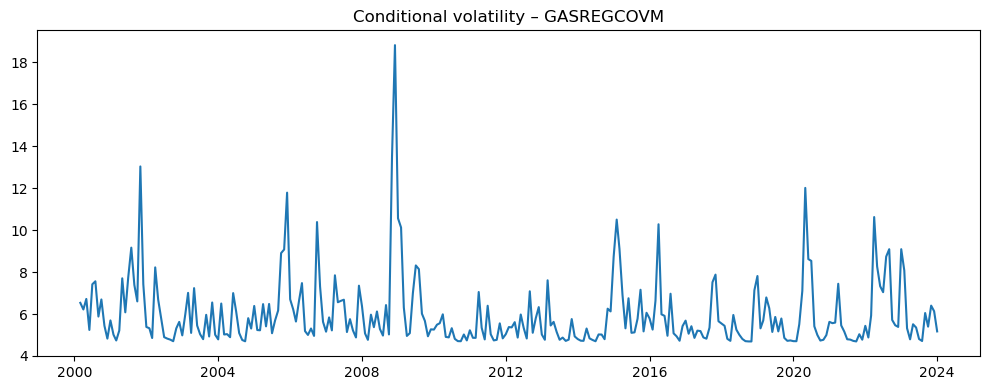

In [5]:
gas_series = load_fred_series("GASREGCOVM (2).csv")
gas_ret = make_log_returns(gas_series)

gas_garch = fit_ar1_garch11(gas_ret)

print("=== GASREGCOVM AR(1)-GARCH(1,1) summary ===")
print(gas_garch.summary())

gas_arch = arch_lm_before_after(gas_ret, gas_garch)
print("\nARCH LM (GASREGCOVM):")
print(gas_arch)

gas_diag = garch_diagnostics(gas_garch)
print("\nDiagnostics (GASREGCOVM):")
print(gas_diag)

plot_conditional_volatility(gas_garch, "Conditional volatility – GASREGCOVM")

## GARCH model for Auto Inventory/Sales Ratio (AISRSA)

=== AISRSA AR(1)-GARCH(1,1) summary ===
                           AR - GARCH Model Results                           
Dep. Variable:                 AISRSA   R-squared:                      -0.004
Mean Model:                        AR   Adj. R-squared:                 -0.007
Vol Model:                      GARCH   Log-Likelihood:               -1035.54
Distribution:                  Normal   AIC:                           2081.09
Method:            Maximum Likelihood   BIC:                           2099.38
                                        No. Observations:                  287
Date:                Sun, Dec 07 2025   Df Residuals:                      285
Time:                        10:58:35   Df Model:                            2
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
Const          0.0858   

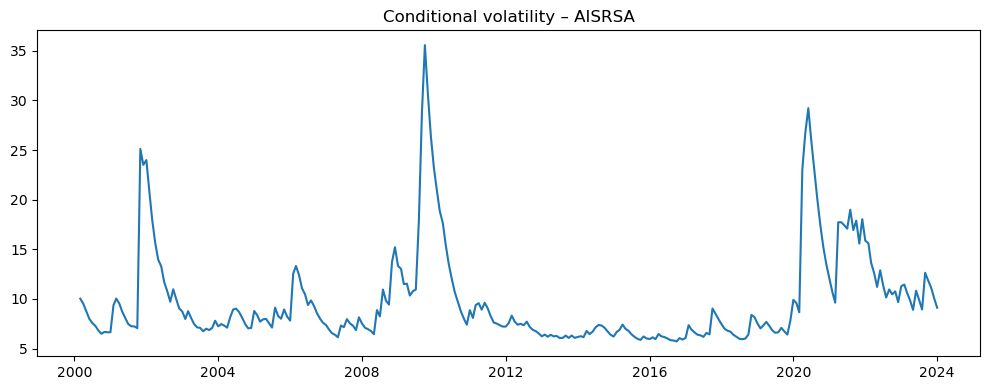

In [8]:
ais_series = load_fred_series("AISRSA (1).csv")
ais_ret = make_log_returns(ais_series)

ais_garch = fit_ar1_garch11(ais_ret)

print("=== AISRSA AR(1)-GARCH(1,1) summary ===")
print(ais_garch.summary())

ais_arch = arch_lm_before_after(ais_ret, ais_garch)
print("\nARCH LM (AISRSA):")
print(ais_arch)

ais_diag = garch_diagnostics(ais_garch)
print("\nDiagnostics (AISRSA):")
print(ais_diag)

plot_conditional_volatility(ais_garch, "Conditional volatility – AISRSA")

## GARCH model for CPI (CPIAUCSL)

=== CPIAUCSL AR(1)-GARCH(1,1) summary ===
                           AR - GARCH Model Results                           
Dep. Variable:               CPIAUCSL   R-squared:                       0.220
Mean Model:                        AR   Adj. R-squared:                  0.217
Vol Model:                      GARCH   Log-Likelihood:               -4.27366
Distribution:                  Normal   AIC:                           18.5473
Method:            Maximum Likelihood   BIC:                           36.8447
                                        No. Observations:                  287
Date:                Sun, Dec 07 2025   Df Residuals:                      285
Time:                        10:58:49   Df Model:                            2
                                 Mean Model                                
                  coef    std err          t      P>|t|    95.0% Conf. Int.
---------------------------------------------------------------------------
Const           0.1

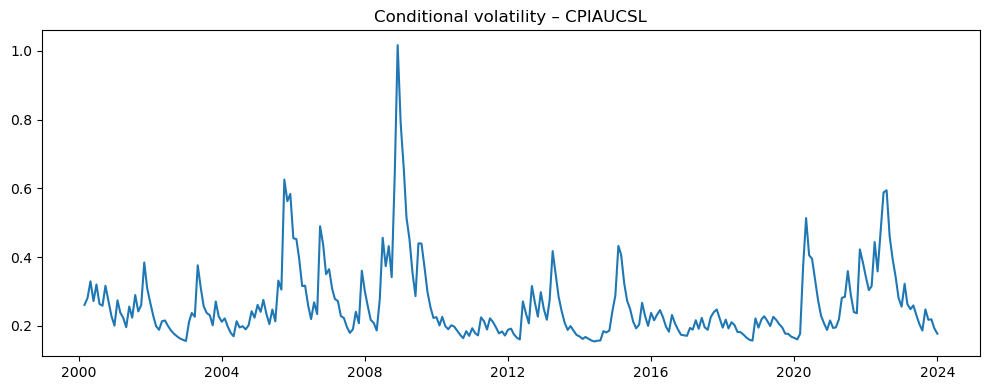

In [9]:
cpi_series = load_fred_series("CPIAUCSL (1).csv")
cpi_ret = make_log_returns(cpi_series)

cpi_garch = fit_ar1_garch11(cpi_ret)

print("=== CPIAUCSL AR(1)-GARCH(1,1) summary ===")
print(cpi_garch.summary())

cpi_arch = arch_lm_before_after(cpi_ret, cpi_garch)
print("\nARCH LM (CPIAUCSL):")
print(cpi_arch)

cpi_diag = garch_diagnostics(cpi_garch)
print("\nDiagnostics (CPIAUCSL):")
print(cpi_diag)

plot_conditional_volatility(cpi_garch, "Conditional volatility – CPIAUCSL")

## GARCH model for Federal Funds Rate (FEDFUNDS)

=== FEDFUNDS AR(1)-GARCH(1,1) summary ===
                           AR - GARCH Model Results                           
Dep. Variable:               FEDFUNDS   R-squared:                       0.158
Mean Model:                        AR   Adj. R-squared:                  0.155
Vol Model:                      GARCH   Log-Likelihood:               -1183.71
Distribution:                  Normal   AIC:                           2377.42
Method:            Maximum Likelihood   BIC:                           2395.71
                                        No. Observations:                  287
Date:                Sun, Dec 07 2025   Df Residuals:                      285
Time:                        10:59:10   Df Model:                            2
                                Mean Model                               
                  coef    std err          t      P>|t|  95.0% Conf. Int.
-------------------------------------------------------------------------
Const           0.0217   

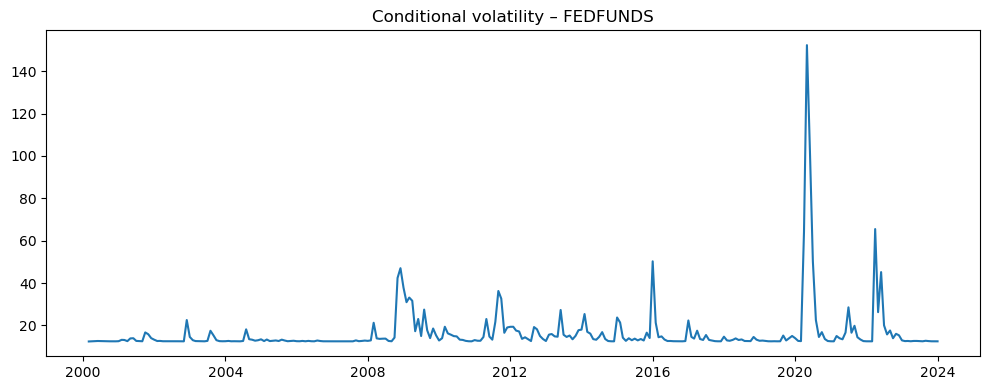

In [10]:
fnd_series = load_fred_series("FEDFUNDS.csv")
fnd_ret = make_log_returns(fnd_series)

fnd_garch = fit_ar1_garch11(fnd_ret)

print("=== FEDFUNDS AR(1)-GARCH(1,1) summary ===")
print(fnd_garch.summary())

fnd_arch = arch_lm_before_after(fnd_ret, fnd_garch)
print("\nARCH LM (FEDFUNDS):")
print(fnd_arch)

fnd_diag = garch_diagnostics(fnd_garch)
print("\nDiagnostics (FEDFUNDS):")
print(fnd_diag)

plot_conditional_volatility(fnd_garch, "Conditional volatility – FEDFUNDS")

## Validation

In [12]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import het_arch

def arch_lm_pre_post(returns, garch_res, nlags=12):
    ar = ARIMA(returns, order=(1, 0, 0)).fit()
    pre_resid = pd.Series(ar.resid).dropna()
    lm1 = het_arch(pre_resid, nlags=nlags)

    post_resid = pd.Series(garch_res.std_resid).dropna()
    lm2 = het_arch(post_resid, nlags=nlags)

    return lm1[0], lm1[1], lm2[0], lm2[1]

def garch_diag(res):
    p = res.params
    alpha = p.get("alpha[1]", np.nan)
    beta = p.get("beta[1]", np.nan)
    omega = p.get("omega", np.nan)
    ab = alpha + beta if np.isfinite(alpha) and np.isfinite(beta) else np.nan
    if np.isfinite(omega) and np.isfinite(ab) and ab < 1:
        unc_var = omega / (1 - ab)
        unc_vol = np.sqrt(unc_var)
    else:
        unc_vol = np.nan
    return alpha, beta, ab, unc_vol, res.loglikelihood, res.aic, res.bic

rows = []

for name, ret, res in [
    ("TOTALSA", total_ret, total_garch),
    ("AMVPNO", amvpno_ret, amvpno_garch),
    ("GASREGCOVM", gas_ret, gas_garch),
]:
    alpha, beta, ab, unc_vol, ll, aic, bic = garch_diag(res)
    pre_lm, pre_p, post_lm, post_p = arch_lm_pre_post(ret, res)
    rows.append({
        "series": name,
        "alpha": alpha,
        "beta": beta,
        "alpha_plus_beta": ab,
        "long_run_vol": unc_vol,
        "loglik": ll,
        "AIC": aic,
        "BIC": bic,
        "pre_ARCH_LM_stat": pre_lm,
        "pre_ARCH_pvalue": pre_p,
        "post_ARCH_LM_stat": post_lm,
        "post_ARCH_pvalue": post_p
    })

garch_validation_df = pd.DataFrame(rows)
print(garch_validation_df.round(4))

       series   alpha    beta  alpha_plus_beta  long_run_vol    loglik  \
0     TOTALSA  0.3664  0.0634           0.4298        6.0549 -896.4226   
1      AMVPNO  0.5541  0.1445           0.6986        5.9081 -845.9206   
2  GASREGCOVM  0.3650  0.1432           0.5082        6.1898 -912.7717   

         AIC        BIC  pre_ARCH_LM_stat  pre_ARCH_pvalue  post_ARCH_LM_stat  \
0  1802.8451  1821.1425           73.4919           0.0000             1.4989   
1  1701.8412  1720.1386           89.3362           0.0000            34.8268   
2  1835.5433  1853.8407           35.9837           0.0003             1.8052   

   post_ARCH_pvalue  
0            0.9999  
1            0.0005  
2            0.9997  
